In [1]:
import numpy as np
import h5py
import treecorr
import pandas as pd
import pylab as mplot
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [ ]:
## data in LSST WL folder
data = pd.DataFrame()
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/DES_psf_catalog.hdf5','r') as f:
    g = f["stars"]
    data['ra'] = g["ra"][:]
    data['dec'] = g["dec"][:]
    data['e1'] = g["measured_e1"][:]
    data['e2'] = g["measured_e2"][:]
    data['e1_model'] = g["model_e1"][:]
    data['e2_model'] = g["model_e2"][:]
    
    data['de1'] = data['e1'] - g["model_e1"][:]
    data['de2'] = data['e2'] - g["model_e2"][:]
    #T_frac = (g["measured_T"][:] - g["model_T"][:]) / g["measured_T"][:]
    data['T_frac'] = (g["measured_T"][:] ** 2 - g["model_T"][:] ** 2) / g["measured_T"][:] ** 2
    data['calib_psf_reserved'] = np.array(g["calib_psf_reserved"][:])
    data['calib_psf_used'] = np.array(g["calib_psf_used"][:])

In [ ]:
data

In [ ]:
data_reserved= data.loc[data['calib_psf_reserved']==1]
data_reserved

In [ ]:
data_used=data.loc[data['calib_psf_used']==0]
data_used

In [2]:
##checking with DES public download
from astropy.table import Table
data = Table.read('psf_y1a1-v13-jj.fits', format='fits')

In [7]:
data

ra,dec,x,y,e1,e2,size,psf_e1,psf_e2,psf_size,exp,ccd,fov_x,fov_y,filter,tiling
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,int16
-35.0833740234375,-51.4946174621582,1385.0888671875,289.1025695800781,-0.026112141087651253,-0.01467164047062397,0.4950573742389679,-0.01641884073615074,0.007252953015267849,0.4982171952724457,228725.0,1.0,-3166.0232306050625,-1582.7946948801678,g,4
-35.07847595214844,-51.47761917114258,1151.427734375,327.7016296386719,-0.026058707386255264,0.01991906575858593,0.508821964263916,-0.01618172787129879,0.008198064751923084,0.4987098276615143,228725.0,1.0,-3227.476111210124,-1572.6431374028525,g,4
-35.062530517578125,-51.522212982177734,1761.6644287109375,471.9386901855469,-0.01253590453416109,0.004537064582109451,0.5017954707145691,-0.01815333031117916,0.004876724909991026,0.500004231929779,228725.0,1.0,-3066.9838820027676,-1534.7087954953513,g,4
-34.96010208129883,-51.518062591552734,1695.4520263671875,1343.9967041015625,-0.018433665856719017,0.0073102801106870174,0.49760177731513977,-0.020236916840076447,0.005128225777298212,0.5036634206771851,228725.0,1.0,-3084.3977264292403,-1305.3575388387046,g,4
-34.95635223388672,-51.404014587402344,130.62265014648438,1357.517578125,-0.04054722934961319,-0.019233662635087967,0.5076663494110107,-0.01984431967139244,0.007709133438766003,0.5130198001861572,228725.0,1.0,-3495.9478432622914,-1301.8015650227865,g,4
-34.950782775878906,-51.417930603027344,320.92840576171875,1407.2703857421875,-0.019807474687695503,0.008375069126486778,0.5031841993331909,-0.01899109035730362,0.008055000565946102,0.5109618306159973,228725.0,1.0,-3445.897435304261,-1288.716543177287,g,4
-34.94122314453125,-51.527347564697266,1821.33935546875,1506.3699951171875,-0.04304871708154678,0.024985209107398987,0.5079672336578369,-0.021632498130202293,0.004381798207759857,0.5040193796157837,228725.0,1.0,-3051.2893669016526,-1262.6533806915284,g,4
-34.93510055541992,-51.45646286010742,848.0923461914062,1547.2144775390625,-0.0174381323158741,0.0073209600523114204,0.5098611116409302,-0.01816648617386818,0.008096745237708092,0.506793200969696,228725.0,1.0,-3307.2533162958784,-1251.9112844899496,g,4
-34.92000961303711,-51.483848571777344,1222.60791015625,1680.218017578125,-0.029829636216163635,0.02738025411963463,0.49603331089019775,-0.01906139776110649,0.007289195898920298,0.5050904750823975,228725.0,1.0,-3208.7557477203372,-1216.931366836548,g,4


In [4]:
data['ra']

-35.0833740234375
-35.07847595214844
-35.062530517578125
-34.96010208129883
-34.95635223388672
-34.950782775878906
-34.94122314453125
-34.93510055541992
-34.92000961303711
-34.91024398803711
-34.90132522583008


In [8]:
#rho 1 
corr = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1']-data['psf_e1'], g2=data['e2']-data['psf_e2'], ra_units="deg", dec_units="deg")
corr.process(cat1)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)


[  0.55708523   0.68038546   0.83086378   1.01463025   1.23917636
   1.51342132   1.84836785   2.25731992   2.75686078   3.3669325
   4.11207611   5.0220396    6.13350193   7.49080768   9.15048811
  11.17243062  13.64529977  16.66480282  20.35390253  24.85522413
  30.35833892  37.07382923  45.27345537  55.2885965   67.51969991
  82.45245564 100.68958006 122.96433062 150.15157332 183.352424
 223.88817458 273.39230698]
[ 2.86097478e-06  2.67627855e-06  2.74480922e-06  2.24582819e-06
  2.13571106e-06  1.93509738e-06  1.60255746e-06  1.29917162e-06
  7.99540457e-07  5.07944118e-07  2.58178163e-07  7.25060023e-08
 -8.84638100e-09  3.51784299e-08  6.23620245e-08  7.19577692e-08
  5.54161322e-08  5.16115509e-08  5.56584699e-08  5.11151626e-08
  5.48549668e-08  4.91828941e-08  5.86449799e-08  5.81048338e-08
  5.56740150e-08  5.42955197e-08  5.39122075e-08  5.32553276e-08
  5.31629834e-08  5.21557655e-08  5.04699259e-08  5.00434339e-08]
[1.40266591e-07 1.15119900e-07 9.45575621e-08 7.77342551e-

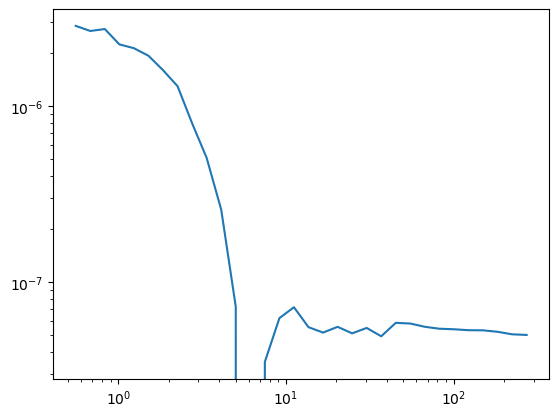

In [10]:
mplot.loglog(np.exp(corr.meanlogr), corr.xip)

In [11]:
#rho 2 
corr = treecorr.GGCorrelation(bin_size=0.2,min_sep= 0.5,max_sep= 300.0, sep_units="arcmin", bin_slop=0.1)
cat1 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1'], g2=data['e2'], ra_units="deg", dec_units="deg")
cat2 = treecorr.Catalog(ra=data['ra'], dec=data['dec'], g1=data['e1']-data['psf_e1'], g2=data['e2']-data['psf_e2'], ra_units="deg", dec_units="deg")
corr.process(cat1, cat2)
print(corr.meanr)
print(corr.xip)
print(corr.varxip**0.5)

[  0.55708523   0.68038546   0.83086378   1.01463025   1.23917636
   1.51342132   1.84836785   2.25731992   2.75686078   3.3669325
   4.11207611   5.0220396    6.13350193   7.49080768   9.15048811
  11.17243062  13.64529977  16.66480282  20.35390253  24.85522413
  30.35833892  37.07382923  45.27345537  55.2885965   67.51969991
  82.45245564 100.68958006 122.96433062 150.15157331 183.35242399
 223.88817458 273.39230698]
[1.56772140e-06 1.60460233e-06 1.63482875e-06 1.04560909e-06
 1.25054584e-06 1.09777128e-06 8.35945520e-07 8.15159555e-07
 2.90972297e-07 2.13408212e-07 1.92825790e-07 1.90251113e-07
 2.48748588e-07 3.40132198e-07 4.18592838e-07 4.47005816e-07
 4.61233464e-07 5.20996542e-07 5.53213657e-07 5.96625066e-07
 5.77789347e-07 5.77601411e-07 5.71073164e-07 6.05883799e-07
 6.58584075e-07 6.66740409e-07 7.16648124e-07 6.98187487e-07
 7.21927933e-07 6.99254018e-07 7.04899940e-07 7.33772830e-07]
[1.91319918e-07 1.57020497e-07 1.28974012e-07 1.06027467e-07
 8.71317384e-08 7.15472944e

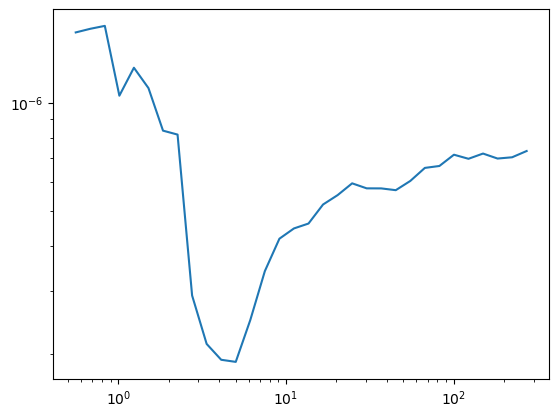

In [12]:
mplot.loglog(np.exp(corr.meanlogr), corr.xip)

In [ ]:
dat

In [ ]:
dat[0][1]